#### Implement Random Forest for Classification

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Select relevant features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# Convert categorical variable 'Sex' to numerical using .loc
X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Handle missing values in the 'Age' column using .loc
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


C:\Users\karma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Implement Random Forest for Regression

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

# Select relevant features and target variable
X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.26
R-squared Score: 0.81


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


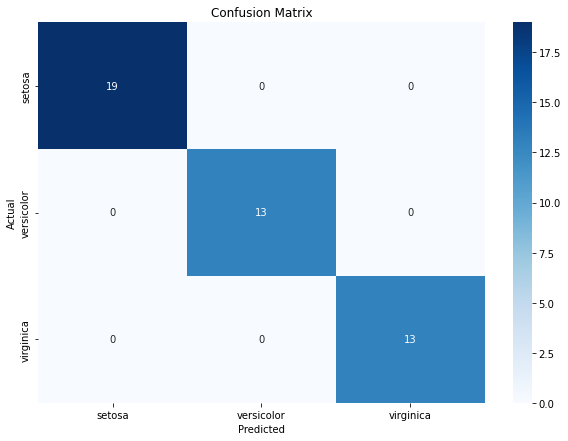

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print the confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Introduction to Random Forest Algorithms

Random Forest is a popular ensemble learning method that is used for both classification and regression tasks. It operates by constructing multiple decision trees during training time and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

### Key Concepts

1. **Ensemble Learning**: Combining multiple models to produce a more robust and accurate model.
2. **Bagging (Bootstrap Aggregating)**: A technique where multiple subsets of data are created by sampling with replacement from the training set. Each subset is used to train a decision tree.
3. **Decision Trees**: The basic building block of a Random Forest. They split the data into subsets based on the most significant features to make predictions.
4. **Feature Randomness**: When splitting nodes in decision trees, Random Forest considers a random subset of features, adding more diversity among the trees.

### Advantages

- **Reduces Overfitting**: By averaging multiple decision trees, Random Forest reduces the risk of overfitting compared to individual decision trees.
- **Handles Missing Values**: Can handle missing values and maintain accuracy for a significant proportion of missing data.
- **Scalability**: Can handle large datasets efficiently.

### Steps to Build a Random Forest Model

1. **Data Preparation**: Clean the data, handle missing values, and split into training and test sets.
2. **Training**: Generate multiple decision trees using different subsets of the training data.
3. **Prediction**: Aggregate the predictions of all the decision trees to make a final prediction.
4. **Evaluation**: Assess the model’s performance using appropriate metrics.

### Python Implementation

Here’s how you can implement a Random Forest classifier using Python and the `scikit-learn` library.

```python
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print the confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
```

### Explanation of the Code

- **Data Loading**: We use the `load_iris()` function to load the Iris dataset.
- **Data Splitting**: The dataset is split into training and test sets using `train_test_split()`.
- **Model Initialization**: We initialize a `RandomForestClassifier` with 100 decision trees (`n_estimators=100`).
- **Training**: The model is trained on the training data.
- **Prediction**: Predictions are made on the test set.
- **Evaluation**: We use accuracy, classification report, and confusion matrix to evaluate the model’s performance.
- **Visualization**: The confusion matrix is visualized using Seaborn's heatmap for better interpretability.

### Hyperparameter Tuning

Random Forest has several hyperparameters that can be tuned to improve performance:
- `n_estimators`: The number of trees in the forest.
- `max_depth`: The maximum depth of each tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `max_features`: The number of features to consider when looking for the best split.

These parameters can be tuned using techniques such as Grid Search or Random Search to find the optimal configuration for your specific dataset.

### Conclusion

Random Forest is a powerful and versatile machine learning algorithm that can handle a wide range of tasks. Its ability to reduce overfitting, handle large datasets, and provide robust predictions makes it a popular choice among data scientists and machine learning practitioners.